In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier

from time import time

import mlrose_hiive

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# helper function to plot curves
def make_plot(x_values, y_values_dict, x_label, y_label, alg):
    
    fig = plt.figure()
    ax = plt.gca()
    for key in y_values_dict.keys():
        ax.plot(x_values, y_values_dict[key], label=key)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    title = '{} as a function of {} for {}'.format(y_label, x_label, alg)
    ax.set_title(title)
    ax.legend()

## Prepare the data

In [4]:
df_white = pd.read_csv('winequality-white.csv', sep=';')
df_red = pd.read_csv('winequality-red.csv', sep=';')

df_white['type'] = ['white'] * len(df_white)
df_red['type'] = ['red'] * len(df_red)

df = pd.concat([df_white, df_red])

X = df.drop(['quality', 'type'], axis=1) 
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2020) 

scaler = StandardScaler()
encoder = LabelEncoder() 

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns) 
y_train = encoder.fit_transform(y_train)

X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns) 
y_test = encoder.fit_transform(y_test)

## Baseline MLPClassifier — classifier from Assignment 1

In [5]:
%%time
a1_clf = MLPClassifier(hidden_layer_sizes=(9,), 
                    random_state=2020, 
                    max_iter=13,
                    alpha=0.3,
                    activation='logistic',
                    learning_rate_init=0.041666666666666664
               )
a1_clf.fit(X_train, y_train)

CPU times: user 134 ms, sys: 4.49 ms, total: 139 ms
Wall time: 159 ms


MLPClassifier(activation='logistic', alpha=0.3, hidden_layer_sizes=(9,),
              learning_rate_init=0.041666666666666664, max_iter=13,
              random_state=2020)

In [6]:
y_predicted = a1_clf.predict(X_test)
print(classification_report(y_test, y_predicted, digits=4))

              precision    recall  f1-score   support

           0     0.9917    0.9715    0.9815       491
           1     0.9905    0.9973    0.9939      1459

    accuracy                         0.9908      1950
   macro avg     0.9911    0.9844    0.9877      1950
weighted avg     0.9908    0.9908    0.9907      1950



## Now analyze how iterations affect performance for several algorithms

In [7]:
max_iter_range = list(range(1,101,10))

### Randomized Hill Climbing

In [8]:
%%time
rhc_fitting_times = []
rhc_train_accuracy = []
rhc_test_accuracy = []

for max_iters in max_iter_range:
    rhc_clf = mlrose_hiive.NeuralNetwork(hidden_nodes = [9], 
                                         activation = 'sigmoid', 
                                         algorithm = 'random_hill_climb', 
                                         max_iters = max_iters, 
                                         bias = True, 
                                         is_classifier = True, 
                                         learning_rate = 0.001, 
                                         early_stopping = True,
                                         clip_max = 5, 
                                         max_attempts = 30, 
                                         random_state=2020
                                        )
    t_start = time()
    rhc_clf.fit(X_train, y_train)
    fit_time = time() - t_start
    
    rhc_fitting_times.append(fit_time)
    
    y_train_pred = rhc_clf.predict(X_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    
    y_test_pred = rhc_clf.predict(X_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    
    rhc_train_accuracy.append(y_train_accuracy)
    rhc_test_accuracy.append(y_test_accuracy)

CPU times: user 2.48 s, sys: 31.4 ms, total: 2.51 s
Wall time: 1.29 s


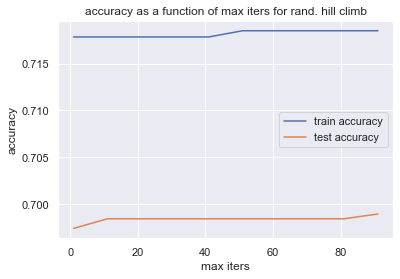

In [9]:
make_plot(x_values=max_iter_range, 
          y_values_dict={'train accuracy':rhc_train_accuracy,
                         'test accuracy':rhc_test_accuracy
                        },
          x_label='max iters',
          y_label='accuracy',
          alg='rand. hill climb')

### Simulated Annealing

In [10]:
%%time
sa_fitting_times = []
sa_train_accuracy = []
sa_test_accuracy = []

for max_iters in max_iter_range:
    sa_clf = mlrose_hiive.NeuralNetwork(hidden_nodes = [9], 
                                         activation = 'sigmoid', 
                                         algorithm = 'simulated_annealing', 
                                         max_iters=max_iters, 
                                         bias = True, 
                                         is_classifier = True, 
                                         learning_rate = 0.001, 
                                         early_stopping = True,
                                         clip_max = 5, 
                                         max_attempts = 30, 
                                         random_state=2020
                                        )
    t_start = time()
    sa_clf.fit(X_train, y_train)
    fit_time = time() - t_start
    
    sa_fitting_times.append(fit_time)
    
    y_train_pred = sa_clf.predict(X_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    
    y_test_pred = sa_clf.predict(X_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    
    sa_train_accuracy.append(y_train_accuracy)
    sa_test_accuracy.append(y_test_accuracy)

CPU times: user 3.43 s, sys: 59.5 ms, total: 3.49 s
Wall time: 1.95 s


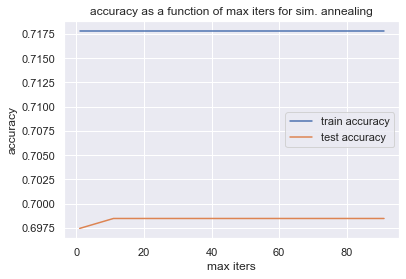

In [11]:
make_plot(x_values=max_iter_range, 
          y_values_dict={'train accuracy':sa_train_accuracy,
                         'test accuracy':sa_test_accuracy
                        },
          x_label='max iters',
          y_label='accuracy',
          alg='sim. annealing')

## Genetic Algorithm

In [12]:
%%time
ga_fitting_times = []
ga_train_accuracy = []
ga_test_accuracy = []

for max_iters in max_iter_range:
    ga_clf = mlrose_hiive.NeuralNetwork(hidden_nodes=[9], 
                                         activation='sigmoid', 
                                         algorithm='genetic_alg', 
                                         max_iters=max_iters, 
                                         bias=True, 
                                         is_classifier=True, 
                                         learning_rate=0.001, 
                                         early_stopping=True,
                                         clip_max=5, 
                                         max_attempts=30, 
                                         random_state=2020
                                        )
    t_start = time()
    ga_clf.fit(X_train, y_train)
    fit_time = time() - t_start
    
    ga_fitting_times.append(fit_time)
    
    y_train_pred = ga_clf.predict(X_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    
    y_test_pred = ga_clf.predict(X_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    
    ga_train_accuracy.append(y_train_accuracy)
    ga_test_accuracy.append(y_test_accuracy)

CPU times: user 5min 12s, sys: 2.71 s, total: 5min 15s
Wall time: 2min 41s


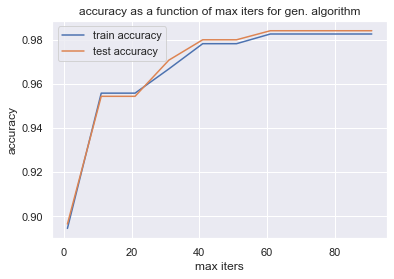

In [13]:
make_plot(x_values=max_iter_range, 
          y_values_dict={'train accuracy':ga_train_accuracy,
                         'test accuracy':ga_test_accuracy
                        },
          x_label='max iters',
          y_label='accuracy', 
          alg='gen. algorithm')

## Gradient Descent

In [14]:
%%time
gd_fitting_times = []
gd_train_accuracy = []
gd_test_accuracy = []

for max_iters in max_iter_range:
    gd_clf = mlrose_hiive.NeuralNetwork(hidden_nodes = [9], 
                                         activation = 'sigmoid', 
                                         algorithm = 'gradient_descent', 
                                         max_iters=max_iters, 
                                         bias = True, 
                                         is_classifier = True, 
                                         learning_rate = 0.001, 
                                         early_stopping = True,
                                         clip_max = 5, 
                                         max_attempts = 30, 
                                         random_state=2020
                                        )
    t_start = time()
    gd_clf.fit(X_train, y_train)
    fit_time = time() - t_start
    
    gd_fitting_times.append(fit_time)
    
    y_train_pred = gd_clf.predict(X_train)
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    
    y_test_pred = gd_clf.predict(X_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    
    gd_train_accuracy.append(y_train_accuracy)
    gd_test_accuracy.append(y_test_accuracy)

CPU times: user 3.17 s, sys: 41.1 ms, total: 3.21 s
Wall time: 1.65 s


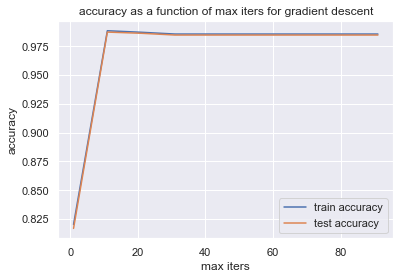

In [15]:
make_plot(x_values=max_iter_range, 
          y_values_dict={'train accuracy':gd_train_accuracy,
                         'test accuracy':gd_test_accuracy
                        },
          x_label='max iters',
          y_label='accuracy', 
          alg='gradient descent')

### Compare train times across different algorithms

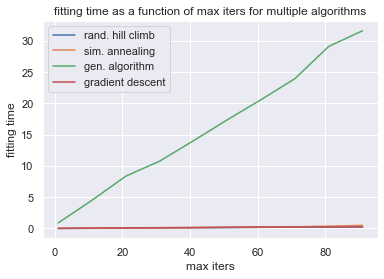

In [16]:
make_plot(x_values=max_iter_range, 
          y_values_dict={'rand. hill climb': rhc_fitting_times,
                         'sim. annealing': sa_fitting_times,
                         'gen. algorithm': ga_fitting_times,
                         'gradient descent': gd_fitting_times
                        },
          x_label='max iters',
          y_label='fitting time', 
          alg='multiple algorithms')